In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.stats as stats

In [2]:
with open('all_trails_engineered.pickle','rb') as read_file:
   hikes_data = pickle.load(read_file)

df = pd.DataFrame(hikes_data)

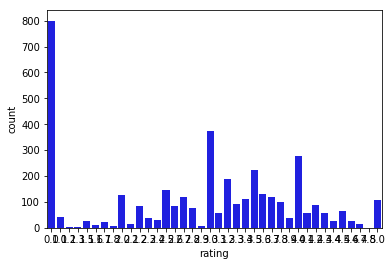

In [4]:
sns.countplot(x='rating',data=df,color='Blue')

In [5]:
#FILTER BY 0 REVIEWS

df.drop(df[df.rating_count == 0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 3798
Data columns (total 54 columns):
Unnamed: 0                                   2999 non-null int64
Coast                                        2999 non-null float64
Dogs allowed on leash                        2999 non-null float64
Dogs not allowed                             2999 non-null float64
Established campsites                        2999 non-null float64
Fall foliage                                 2999 non-null float64
Good for kids                                2999 non-null float64
Lakes                                        2999 non-null float64
Mountain views                               2999 non-null float64
Old growth                                   2999 non-null float64
Ridges/passes                                2999 non-null float64
Rivers                                       2999 non-null float64
Summits                                      2999 non-null float64
Waterfalls              

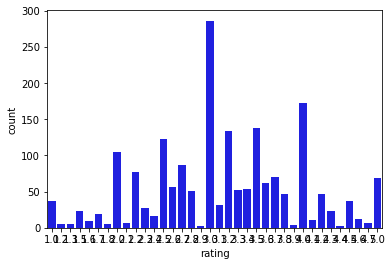

In [46]:
sns.countplot(x='rating',data=df,color='Blue')

## Filter only dayhikes (miles>20)

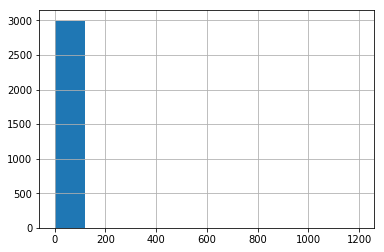

In [6]:
df.distance_mi.hist()

In [7]:
df.distance_mi.max()

1200.0

In [8]:
df[df['distance_mi']>30][['trail_name','distance_mi']]

,trail_name,distance_mi
203,Spokane Centennial Trail,37.0
242,Middle Fork Pasayten River,46.0
243,Klickitat Trail,38.2
279,Milk Creek,34.7
294,Pacific Crest Trail (PCT) Section J - Snoqualm...,74.7
380,Devils Dome Loop,43.0
392,Buckskin Ridge,33.4
419,Boundary Trail - Pasayten,80.0
420,Andrews Creek,31.0
481,Copper Ridge Loop,34.0


In [9]:
df['distance_mi'].describe()

count    2999.000000
mean        5.578096
std        23.720587
min         0.000000
25%         0.000000
50%         3.000000
75%         8.000000
max      1200.000000
Name: distance_mi, dtype: float64

In [11]:
df.drop(df[df.distance_mi >20].index, inplace=True)
#df.drop(df[df.lat==0].index, inplace=True)
#df.drop(df[df.long==0].index, inplace=True)

In [54]:
#df.distance_mi.max()
#df.lat.min()

44.8777

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 3798
Data columns (total 54 columns):
Unnamed: 0                                   2916 non-null int64
Coast                                        2916 non-null float64
Dogs allowed on leash                        2916 non-null float64
Dogs not allowed                             2916 non-null float64
Established campsites                        2916 non-null float64
Fall foliage                                 2916 non-null float64
Good for kids                                2916 non-null float64
Lakes                                        2916 non-null float64
Mountain views                               2916 non-null float64
Old growth                                   2916 non-null float64
Ridges/passes                                2916 non-null float64
Rivers                                       2916 non-null float64
Summits                                      2916 non-null float64
Waterfalls              

# EDA

In [13]:
potential_features = ['Coast', 'Dogs allowed on leash', 'Dogs not allowed',
       'Established campsites', 'Fall foliage', 'Good for kids', 'Lakes',
       'Mountain views', 'Old growth', 'Ridges/passes', 'Rivers', 'Summits',
       'Waterfalls', 'Wildflowers/Meadows', 'Wildlife', 'distance_how',
       'distance_mi', 'gain', 'highest_pt', 'lat', 'long', 'num_reports',
       'permit', 'rating', 'rating_count', 'region', 'trail_name', 'subregion',
       'Central Washington', 'Eastern Washington', 'Issaquah Alps',
       'Mount Rainier Area', 'North Cascades', 'Olympic Peninsula',
       'Puget Sound and Islands', 'Snoqualmie Region', 'South Cascades',
       'Southwest Washington', 'Discover Pass, Refuge Entrance Pass',
       'National Monument Fee', 'National Monument Fee, Sno-Parks Permit',
       'National Park Pass', 'National Park Pass, Northwest Forest Pass',
       'None', 'None, Northwest Forest Pass', 'Northwest Forest Pass',
       'Oregon State Parks Day-Use', 'Refuge Entrance Pass',
       'Sno-Parks Permit', 'num_features']
for x in range(50):
    print(str(x) + " " +potential_features[x])

0 Coast
1 Dogs allowed on leash
2 Dogs not allowed
3 Established campsites
4 Fall foliage
5 Good for kids
6 Lakes
7 Mountain views
8 Old growth
9 Ridges/passes
10 Rivers
11 Summits
12 Waterfalls
13 Wildflowers/Meadows
14 Wildlife
15 distance_how
16 distance_mi
17 gain
18 highest_pt
19 lat
20 long
21 num_reports
22 permit
23 rating
24 rating_count
25 region
26 trail_name
27 subregion
28 Central Washington
29 Eastern Washington
30 Issaquah Alps
31 Mount Rainier Area
32 North Cascades
33 Olympic Peninsula
34 Puget Sound and Islands
35 Snoqualmie Region
36 South Cascades
37 Southwest Washington
38 Discover Pass, Refuge Entrance Pass
39 National Monument Fee
40 National Monument Fee, Sno-Parks Permit
41 National Park Pass
42 National Park Pass, Northwest Forest Pass
43 None
44 None, Northwest Forest Pass
45 Northwest Forest Pass
46 Oregon State Parks Day-Use
47 Refuge Entrance Pass
48 Sno-Parks Permit
49 num_features


In [14]:
df.highest_pt.apply(lambda x: str(x).replace('-50000','0'))
df.highest_pt.astype(int)
df.highest_pt.min()                          

-50000.0

In [15]:
df.drop(df[df.highest_pt < 0].index, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 2495
Data columns (total 50 columns):
Coast                                      1853 non-null float64
Dogs allowed on leash                      1853 non-null float64
Dogs not allowed                           1853 non-null float64
Established campsites                      1853 non-null float64
Fall foliage                               1853 non-null float64
Good for kids                              1853 non-null float64
Lakes                                      1853 non-null float64
Mountain views                             1853 non-null float64
Old growth                                 1853 non-null float64
Ridges/passes                              1853 non-null float64
Rivers                                     1853 non-null float64
Summits                                    1853 non-null float64
Waterfalls                                 1853 non-null float64
Wildflowers/Meadows                        1853 

In [16]:
with open('filtered_day_hikes_allData.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

# Open pickle

In [17]:
with open('filtered_day_hikes_allData.pickle','rb') as read_file:
   hikes_data = pickle.load(read_file)

df = pd.DataFrame(hikes_data)

# Explore Distribution of Y 

/home/kmussar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


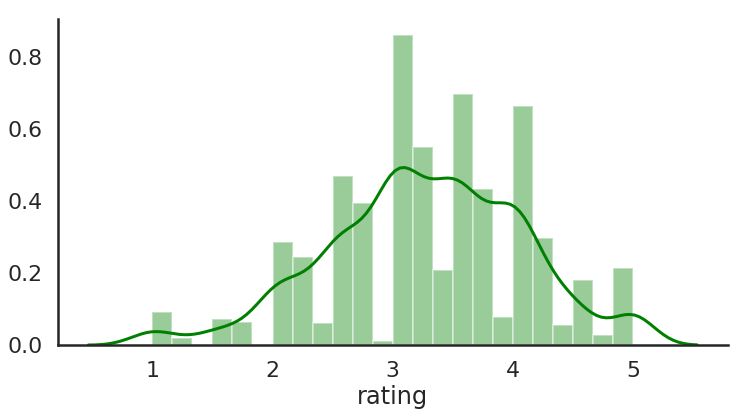

In [18]:
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.set_context("poster")
sns.distplot(df['rating'],color='Green')
#sns.set(ylabel='Percent of Sample')
sns.despine()

Text(0.5, 1.0, 'Normal Q-Q plot')

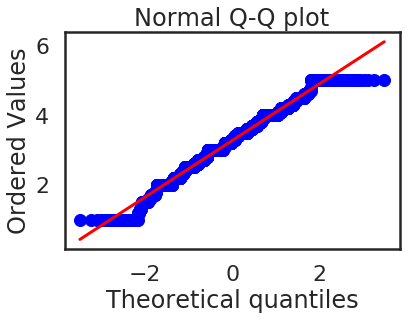

In [19]:
# Q-Q plot
stats.probplot(df['rating'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
#plt.savefig('QQ_plot.png',dpi=300,transparent=True)

# EDA of Features

In [21]:
no_LatLong = df.drop(df[df.lat == 0].index)
no_LatLong = df.drop(df[df.long == 0].index)
no_LatLong.long.describe()

count    2081.000000
mean     -121.572703
std         1.247798
min      -124.732000
25%      -122.143300
50%      -121.635500
75%      -121.075100
max      -113.884300
Name: long, dtype: float64

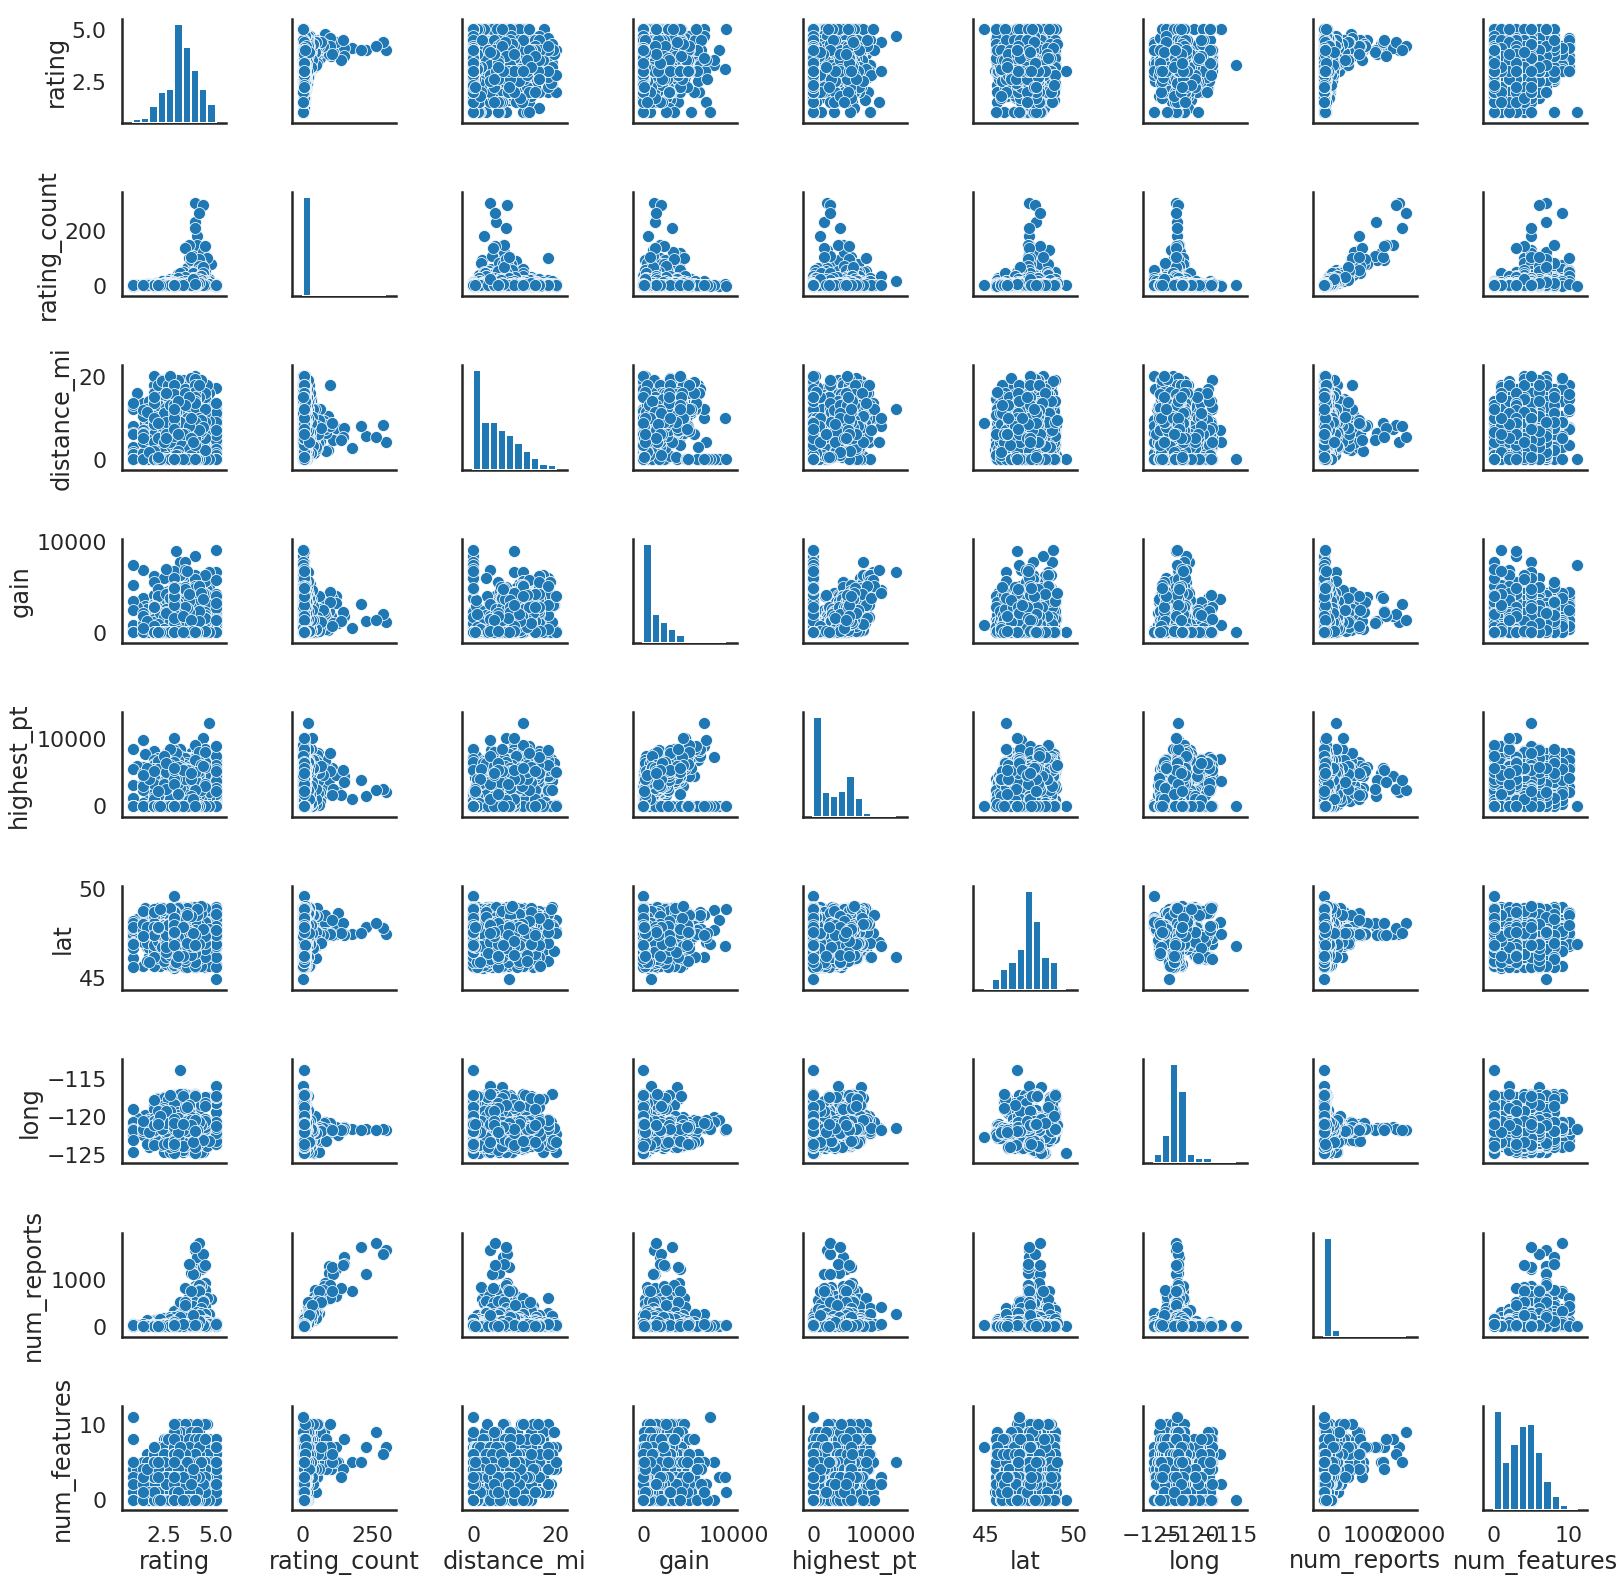

In [22]:
sns.pairplot(no_LatLong[['rating','rating_count','distance_mi', 'gain', 'highest_pt', 'lat', 'long', 'num_reports','num_features']])
plt.savefig('pairplot.png',dpi=300,transparent=True)

<Figure size 720x720 with 0 Axes>

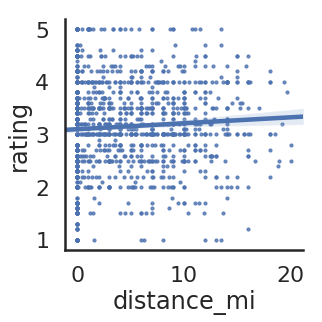

In [60]:
# distance (mi)
plt.figure(figsize=(10,10))
sns.set_style("white")
sns.set_context("poster")
sns.lmplot(y='rating',x='distance_mi',data=df,scatter_kws={"marker":"D","s": 10})
plt.savefig('distance vs rating.png',dpi=300,transparent=True)

<Figure size 720x720 with 0 Axes>

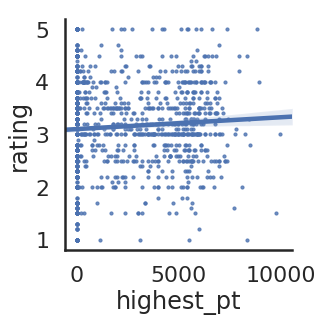

In [61]:
# highest point
plt.figure(figsize=(10,10))
sns.set_style("white")
sns.set_context("poster")
sns.lmplot(y='rating',x='highest_pt',data=df,scatter_kws={"marker":"D","s": 10})
plt.savefig('highest_pt vs rating.png',dpi=300,transparent=True)

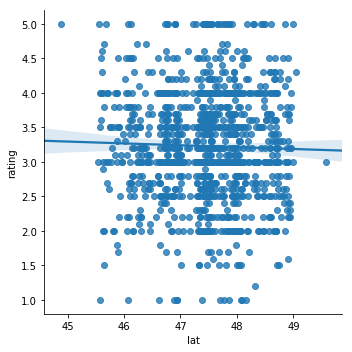

In [83]:
sns.lmplot(y='rating',x='lat',data=df)

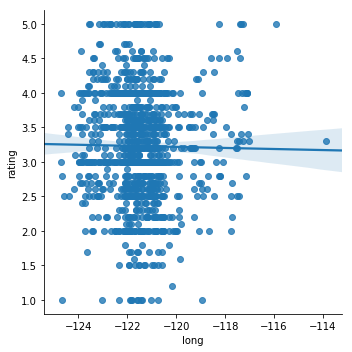

In [84]:
sns.lmplot(y='rating',x='long',data=df)

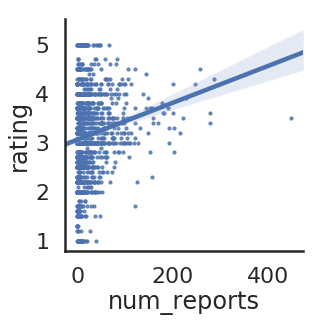

In [63]:
#number of trip reports
sns.lmplot(y='rating',x='num_reports',data=df,scatter_kws={"marker":"D","s": 10})
plt.savefig('num_reports vs rating.png',dpi=300,transparent=True)

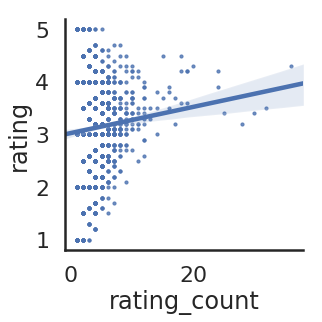

In [66]:
# number of ratings
sns.lmplot(y='rating',x='rating_count',data=df,scatter_kws={"marker":"D","s": 10})
plt.savefig('rating_count vs rating.png',dpi=300,transparent=True)

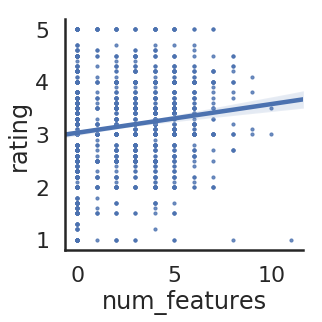

In [68]:
# number of features 
sns.lmplot(y='rating',x='num_features',data=df,scatter_kws={"marker":"D","s": 10})
plt.savefig('num_features vs rating.png',dpi=300,transparent=True)

Established campsites


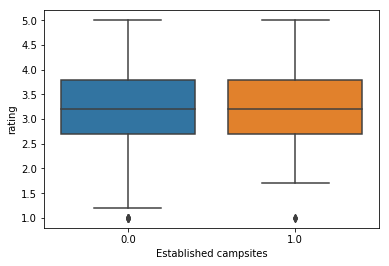

In [104]:
print(potential_features[3])
sns.boxplot(x=potential_features[3],y='rating',data=df)

Mountain views


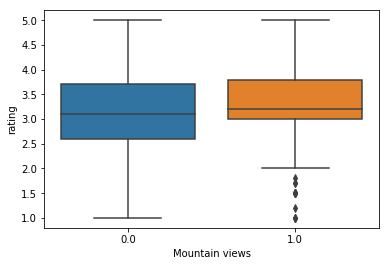

In [103]:
print(potential_features[7])
sns.boxplot(x=potential_features[7],y='rating',data=df)

Ridges/passes


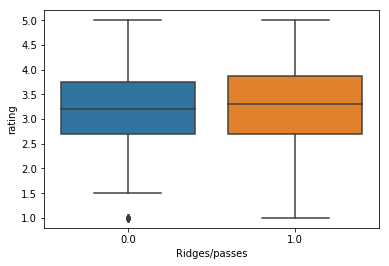

In [102]:
print(potential_features[9])
sns.boxplot(x=potential_features[9],y='rating',data=df)

Summits


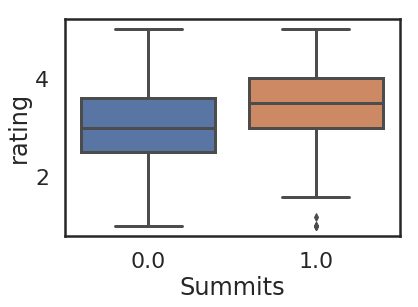

In [70]:
print(potential_features[11])
sns.boxplot(x=potential_features[11],y='rating',data=df)
plt.savefig('summits vs rating.png',dpi=300,transparent=True)

Summits


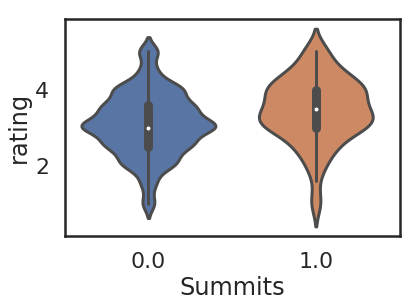

In [54]:
print(potential_features[11])
sns.violinplot(x=potential_features[11],y='rating',data=df)

Waterfalls


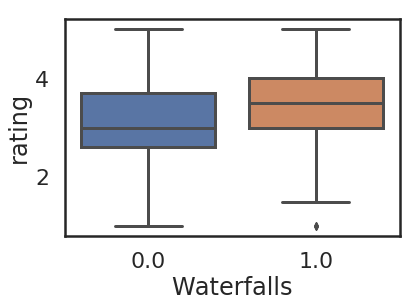

In [72]:
print(potential_features[12])
sns.boxplot(x=potential_features[12],y='rating',data=df)
plt.savefig('waterfalls vs rating.png',dpi=300,transparent=True)

Wildflowers/Meadows


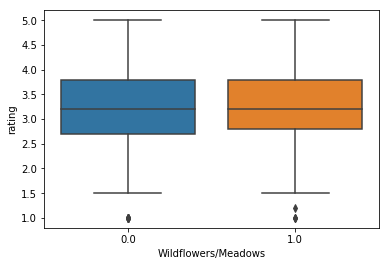

In [99]:
print(potential_features[13])
sns.boxplot(x=potential_features[13],y='rating',data=df)

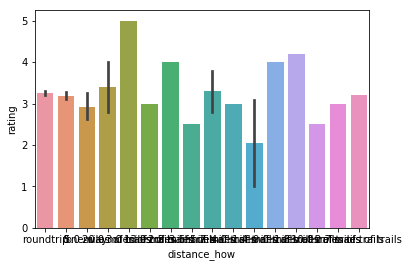

In [98]:
sns.barplot(x=potential_features[15],y='rating',data=df)

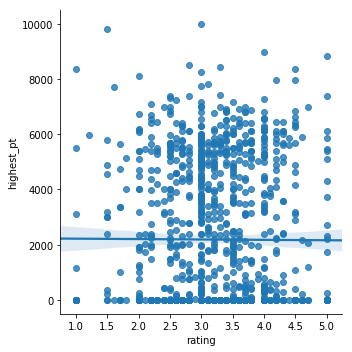

In [97]:
sns.lmplot(x='rating',y='highest_pt',data=df)

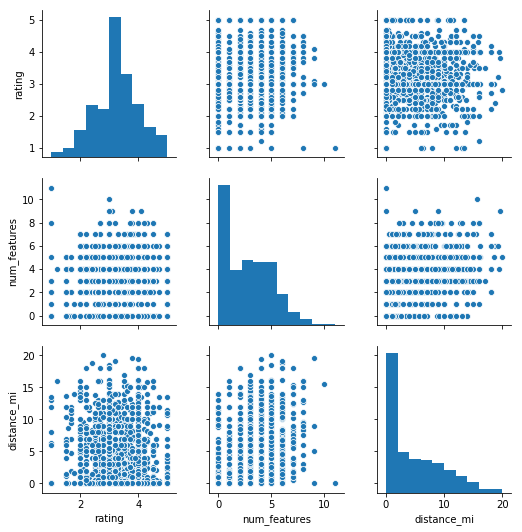

In [105]:
sns.pairplot(data=df[['rating','num_features','distance_mi']])

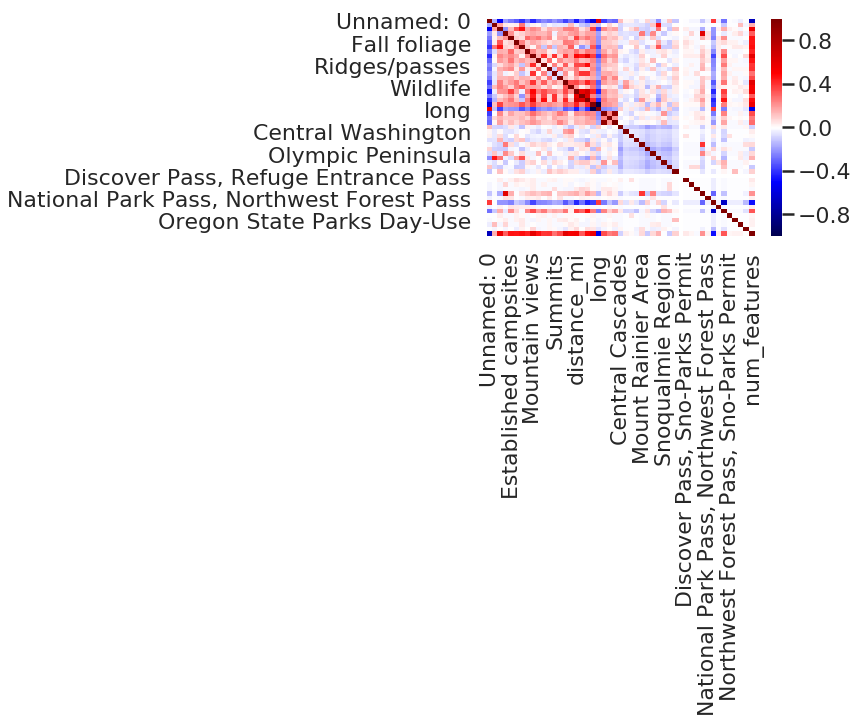

In [23]:
sns.heatmap(df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1)

In [24]:
df.corr()['rating']

Unnamed: 0                                  -0.269020
Coast                                        0.080053
Dogs allowed on leash                        0.143447
Dogs not allowed                             0.101439
Established campsites                        0.103491
Fall foliage                                 0.106764
Good for kids                                0.133063
Lakes                                        0.085360
Mountain views                               0.181414
Old growth                                   0.084392
Ridges/passes                                0.112198
Rivers                                       0.062225
Summits                                      0.166545
Waterfalls                                   0.128187
Wildflowers/Meadows                          0.130179
Wildlife                                     0.071591
distance_mi                                  0.129037
gain                                         0.109920
highest_pt                  

Wildflowers/Meadows


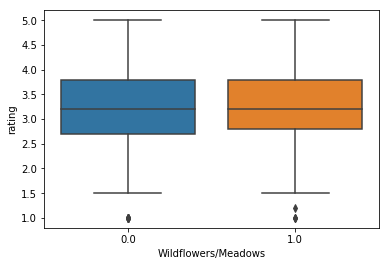

In [109]:
print(potential_features[13])
sns.boxplot(x=potential_features[13],y='rating',data=df)

In [159]:
#28 Central Washington
#sns.boxplot(x=potential_features[28],y='rating',data=df)

In [161]:
#29 Eastern Washington
#sns.boxplot(x=potential_features[29],y='rating',data=df)

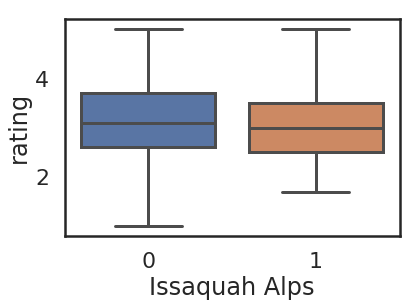

In [75]:
#30 Issaquah Alps
sns.boxplot(x=potential_features[30],y='rating',data=df)

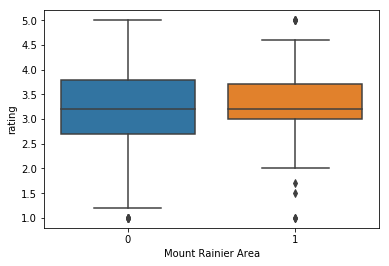

In [111]:
#31 Mount Rainier Area
sns.boxplot(x=potential_features[31],y='rating',data=df)

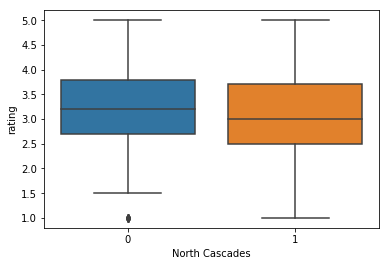

In [112]:
#32 North Cascades
sns.boxplot(x=potential_features[32],y='rating',data=df)

In [166]:
#33 Olympic Peninsula
#sns.boxplot(x=potential_features[33],y='rating',data=df)

In [168]:
#34 Puget Sound and Islands
#sns.boxplot(x=potential_features[34],y='rating',data=df)

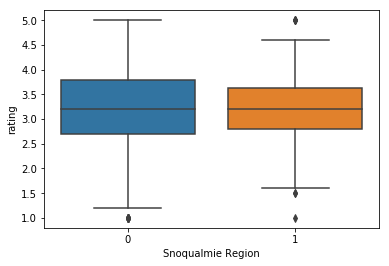

In [113]:
#35 Snoqualmie Region
sns.boxplot(x=potential_features[35],y='rating',data=df)

In [171]:
#36 South Cascades
#sns.boxplot(x=potential_features[36],y='rating',data=df)

In [173]:
#37 Southwest Washington
#sns.boxplot(x=potential_features[37],y='rating',data=df)

In [175]:
#38 Discover Pass, Refuge Entrance Pass
#sns.boxplot(x=potential_features[38],y='rating',data=df)

In [177]:
#39 National Monument Fee
#sns.boxplot(x=potential_features[39],y='rating',data=df)

In [179]:
#40 National Monument Fee, Sno-Parks Permit
#sns.boxplot(x=potential_features[40],y='rating',data=df)

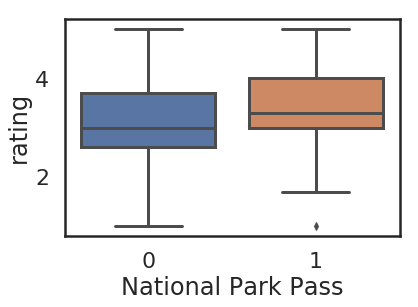

In [77]:
#41 National Park Pass
sns.boxplot(x=potential_features[41],y='rating',data=df)
plt.savefig('nat_park_pass vs rating.png',dpi=300,transparent=True)

In [182]:
#42 National Park Pass, Northwest Forest Pass
#sns.boxplot(x=potential_features[42],y='rating',data=df)

In [184]:
#43 None
#sns.boxplot(x=potential_features[43],y='rating',data=df)

In [186]:
#44 None, Northwest Forest Pass
#sns.boxplot(x=potential_features[44],y='rating',data=df)

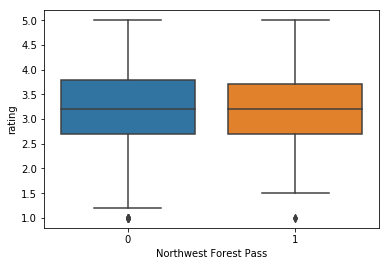

In [115]:
#45 Northwest Forest Pass
sns.boxplot(x=potential_features[45],y='rating',data=df)

In [189]:
#46 Oregon State Parks Day-Use
#sns.boxplot(x=potential_features[46],y='rating',data=df)

In [191]:
#47 Refuge Entrance Pass
#sns.boxplot(x=potential_features[47],y='rating',data=df)

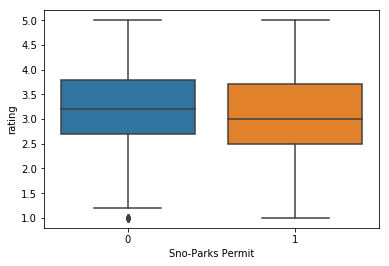

In [116]:
#48 Sno-Parks Permit
sns.boxplot(x=potential_features[48],y='rating',data=df)

In [118]:
df.corr()['rating']

Coast                                      0.042327
Dogs allowed on leash                      0.068666
Dogs not allowed                           0.038327
Established campsites                      0.006244
Fall foliage                               0.061981
Good for kids                              0.093447
Lakes                                      0.001289
Mountain views                             0.055589
Old growth                                 0.062327
Ridges/passes                              0.028029
Rivers                                    -0.012396
Summits                                    0.120744
Waterfalls                                 0.071659
Wildflowers/Meadows                        0.016702
Wildlife                                   0.007326
distance_mi                               -0.003414
gain                                      -0.000322
highest_pt                                -0.004464
lat                                       -0.026929
long        

In [25]:
design_matrix_all = (['Established campsites','Mountain views',
                      'Ridges/passes', 'Summits','Waterfalls',
                      'Wildflowers/Meadows', 'distance_mi',
                      'highest_pt', 'lat', 'long', 'num_reports',
                      'rating_count','Issaquah Alps',
                      'Mount Rainier Area', 'North Cascades',
                      'Snoqualmie Region', 'National Park Pass',
                      ' Northwest Forest Pass','Sno-Parks Permit',
                      'num_features'])

In [26]:
df_dayHikes_subset = df[['rating','Established campsites','Mountain views',
                      'Ridges/passes', 'Summits','Waterfalls',
                      'Wildflowers/Meadows', 'distance_mi',
                      'highest_pt', 'lat', 'long', 'num_reports',
                      'rating_count','Issaquah Alps',
                      'Mount Rainier Area', 'North Cascades',
                      'Snoqualmie Region', 'National Park Pass',
                      'Northwest Forest Pass','Sno-Parks Permit',
                      'num_features']]

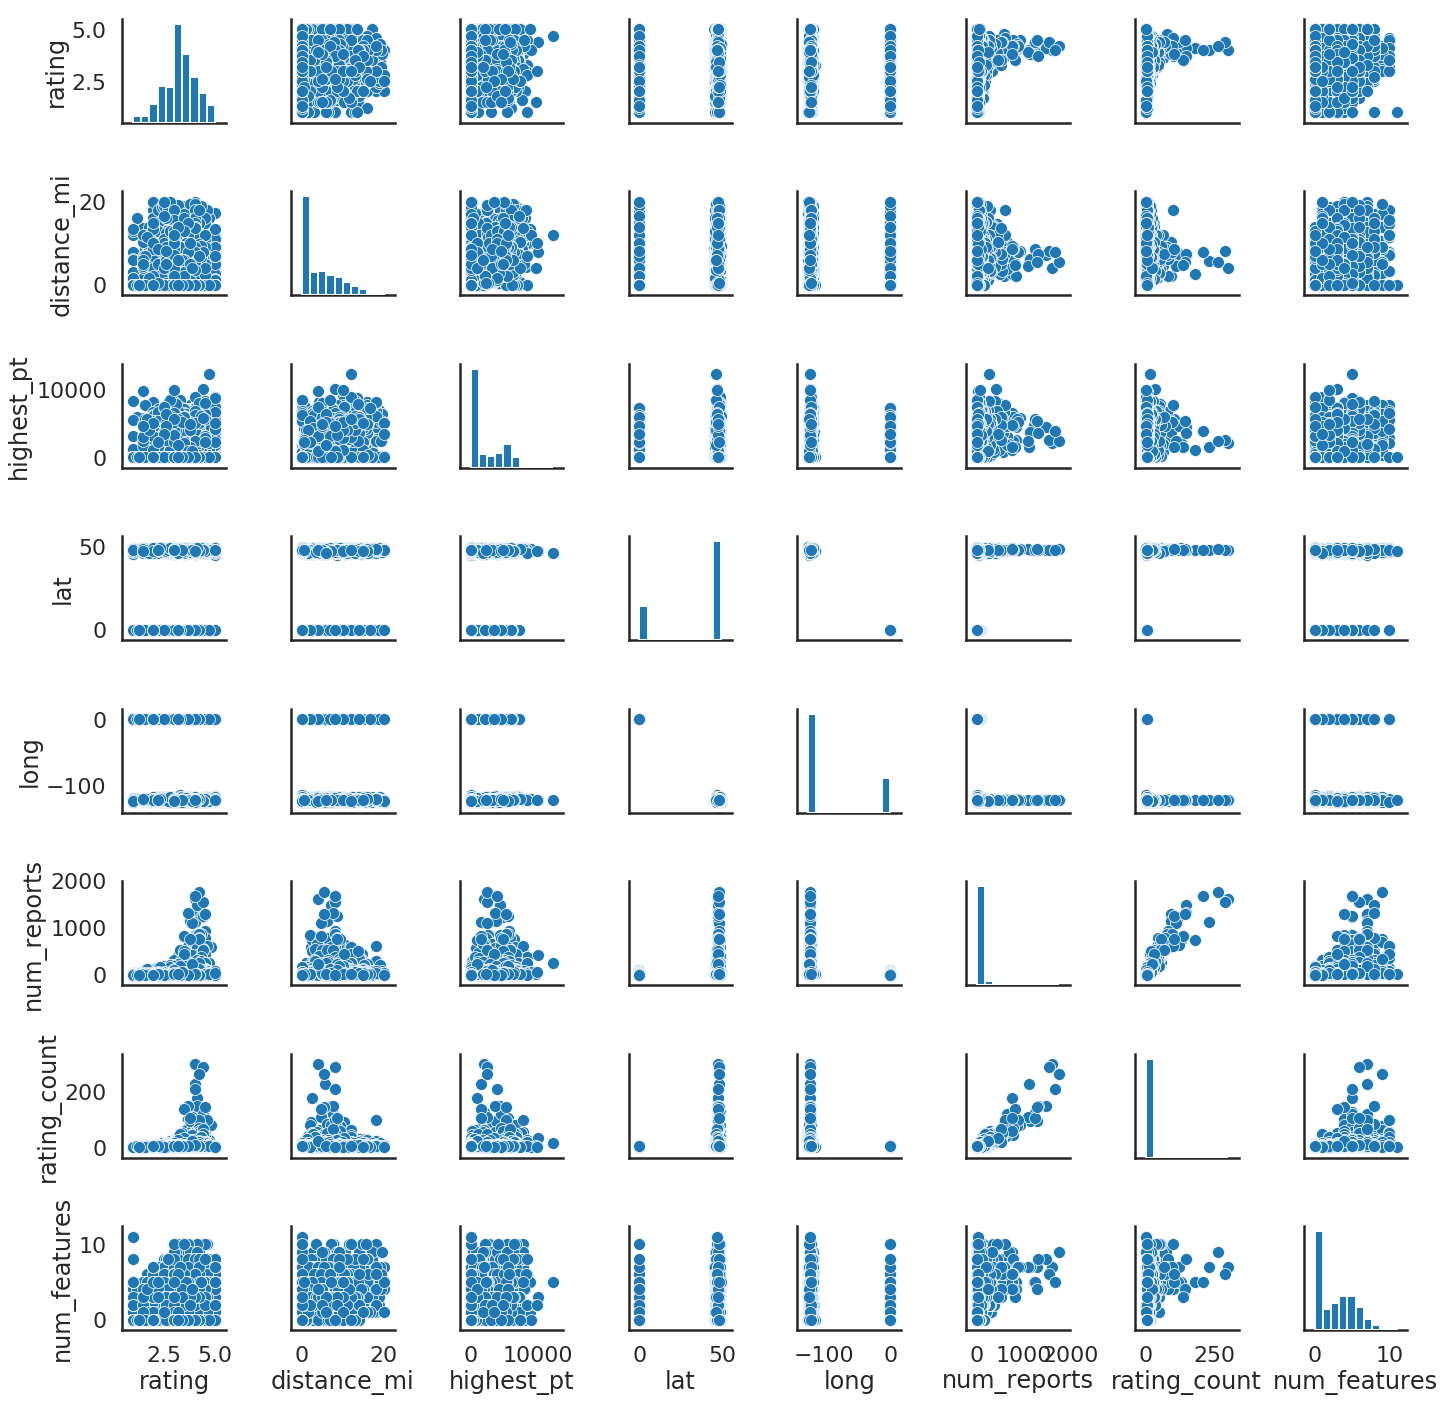

In [27]:
sns.pairplot(df[['rating','distance_mi','highest_pt', 'lat', 'long', 'num_reports','rating_count','num_features']])

In [29]:
with open('all_data_filtered_day_hikes2.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

In [30]:
with open('all_data_filtered_day_hikes_subset_features2.pickle', 'wb') as to_write:
    pickle.dump(df_dayHikes_subset, to_write)